In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pickle import *
from matplotlib.animation import FuncAnimation
from matplotlib.animation import MovieWriterRegistry
from matplotlib.animation import FFMpegBase
from IPython.display import HTML
# from itertools import cycle

In [2]:
f = open("dati_simulazione_prova", "rb")
l_temp = load(f)
print(l_temp)
U = []
for i in range(l_temp-1):
    U.append(load(f))

5254


In [3]:
I = np.zeros(32) # Strade del tipo I: strade principali interne alla rete
for i in range(len(I)+1):
    if i in [1,2,12,13,14,15,27,28,29,30]:
        I[i-1] = 170
    elif i in [5,6]:
        I[i-1] = 450
    elif i in [9,11,16,19,22]:
        I[i-1] = 150
    elif i in [17,18,20,21,23,24,25,26]:
        I[i-1] = 85
    elif i in [10,31,32]:
        I[i-1] = 46
I[2] = 140
I[3] = 110
I[6] = 56
I[7] = 16

j = np.ones(10)*8 # Strade del tipo j: strade interne agli incroci

r = np.zeros(8) # Strade del tipo r: strade interne alle rotonde
for i  in range(len(r)+1):
    if i in [7,8]:
        r[i-1] = 4
    elif i in [3,6]:
        r[i-1] = 12
r[0] = 8
r[1] = 10
r[3] = 17
r[4] = 14

In [4]:
dx =[I[i]/100 for i in range(len(I))] # Per le strade interne prendiamo uno step del 1%
dx.append(np.float64(0.8)) # Per le strade degli incroci prendiamo un step del 10%
dx.extend(r[k]/10 for k in range(len(r))) # Per le strade delle rotonde prendiamo uno step del 10%
dx_min = min(dx)

xx = [np.arange(dx[i]/2, I[i], dx[i]) for i in range(len(I))]
xx.extend(np.arange(dx[i]/2, j[i], dx[i]) for i in range(len(j)))
xx.extend(np.arange(dx[i]/2, r[i], dx[i]) for i in range(len(r)))

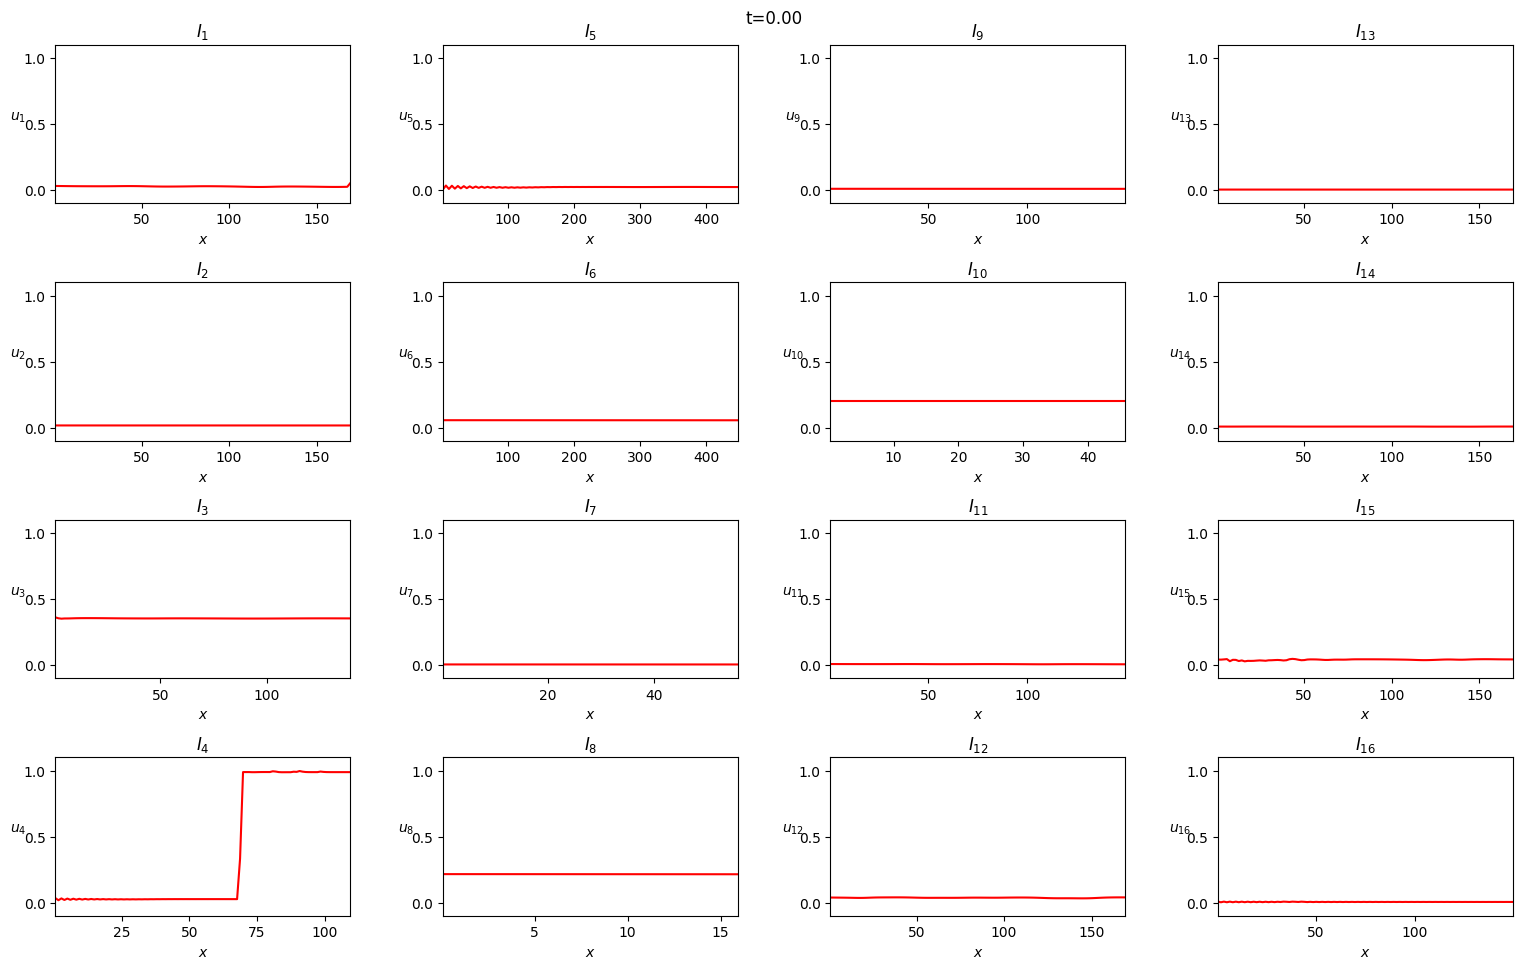

In [5]:
fig, ax = plt.subplots(4,4, figsize= (16,10))
plt.tight_layout(pad = 3.6)
fig.suptitle('t={:.2f}'.format(0))
profile = [0]*16

for i in range(16):
    column = i//4
    line = i%4

    profile[i], = ax[line, column].plot(xx[i], U[0][i], color='red', ls='-')
    ax[line, column].set_xlabel('$x$')
    ax[line, column].set_ylabel('$u_{{{}}}$'.format(i+1), rotation=0)
    ax[line, column].set_ylim(-0.1, 1.1)
    ax[line, column].set_xlim(xx[i][0], xx[i][-1])
    ax[line, column].set_title('$I_{{{}}}$'.format(i+1))

def animate_1(k):
    for i in range(16):
        profile[i].set_data(xx[i],U[k][i])
        #fig.suptitle('t = {:.2f}'.format(tt[k]))
def init_1():
    plt.rcParams.update({'font.size':14})
    return profile

steps = range(0,l_temp,8)
ani = FuncAnimation(fig,animate_1,steps,init_1,interval = 50, blit = False, repeat = False)
HTML(ani.to_html5_video())

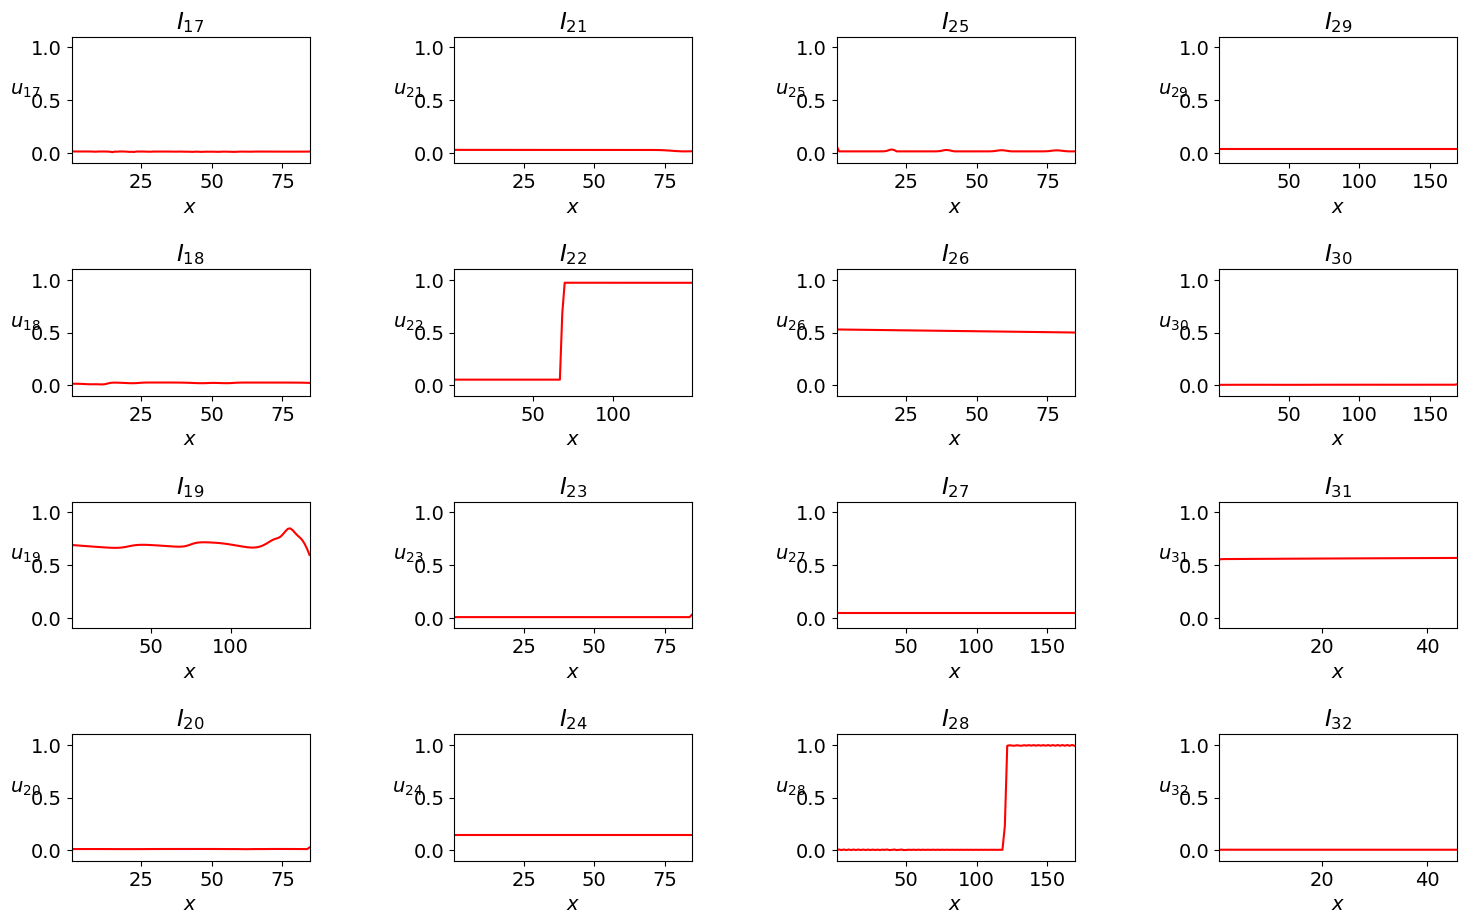

In [6]:
fig, bx = plt.subplots(4,4, figsize=(16,10))
profile = [0]*16
plt.tight_layout(pad = 3.6)

for i in range(16):
    column = i//4
    line = i%4

    profile[i], = bx[line, column].plot(xx[i+16], U[0][i+16], color='red', ls='-')
    bx[line, column].set_xlabel('$x$')
    bx[line, column].set_ylabel('$u_{{{}}}$'.format(i+17), rotation=0)
    bx[line, column].set_ylim(-0.1, 1.1)
    bx[line, column].set_xlim(xx[i+16][0], xx[i+16][-1])
    bx[line, column].set_title('$I_{{{}}}$'.format(i+17))

def animate_2(k):
    for i in range(16):
        profile[i].set_data(xx[i+16],U[k][i+16])
        #fig.suptitle('t = {:.2f}'.format(tt[k]))
def init_2():
    plt.rcParams.update({'font.size':14})
    return profile

steps = range(0,l_temp,8)
ani = FuncAnimation(fig,animate_2,steps,init_2,interval = 50, blit = False, repeat = False)
HTML(ani.to_html5_video())